In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = gamma

    def build(self, input_shape):
        # Create a trainable weight variable for the centers of the RBFs
        self.centers = self.add_weight(name='centers',
                                      shape=(self.units, input_shape[-1]),
                                      initializer='uniform',
                                      trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        # Calculate the radial basis functions for each input sample and each RBF center
        diff = K.expand_dims(inputs) - self.centers  # shape: (batch_size, units, input_dim)
        norm = K.sum(K.square(diff), axis=-1)  # shape: (batch_size, units)
        rbf = K.exp(-self.gamma * norm)  # shape: (batch_size, units)

        return rbf

    def compute_output_shape(self, input_shape):
        return input_shape[0], self.units

In [10]:
# load Pivot data
url = 'https://raw.githubusercontent.com/ravsssh/HandballPrediction/main/Handball%20Prediction/data/P.csv'
df = pd.read_csv(url, delimiter=';')
# Menentukan input and output
X = df.drop(columns=["GOAL","7MSHOT","9MSHOT","6MSHOT","WINGSHOT","PIVOTSHOT","FASTBREAKSHOT"])
y = df.GOAL
# Membagi data set 80 : 20 train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Merancang Neural Network Model
model = Sequential()
model.add(Flatten(input_shape=(6,)))  
model.add(RBFLayer(6, 0.5))
model.add(Dense(1, activation='linear'))  
model.compile(optimizer='RMSprop', loss=mean_squared_error)  
# Melatih arsitektur model terhadap dataset
model.fit(X_train, y_train, batch_size=8, epochs=100)
# Melakukan prediksi nilai
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

Epoch 1/100
153/153 [==============================] - 1s 1ms/step - loss: 3.4471
Epoch 2/100
153/153 [==============================] - 0s 925us/step - loss: 2.5194
Epoch 3/100
153/153 [==============================] - 0s 1ms/step - loss: 2.2816
Epoch 4/100
153/153 [==============================] - 0s 1ms/step - loss: 2.1658
Epoch 5/100
153/153 [==============================] - 0s 1ms/step - loss: 2.0699
Epoch 6/100
153/153 [==============================] - 0s 888us/step - loss: 1.9788
Epoch 7/100
153/153 [==============================] - 0s 932us/step - loss: 1.9019
Epoch 8/100
153/153 [==============================] - 0s 866us/step - loss: 1.8351
Epoch 9/100
153/153 [==============================] - 0s 905us/step - loss: 1.7732
Epoch 10/100
153/153 [==============================] - 0s 938us/step - loss: 1.7195
Epoch 11/100
153/153 [==============================] - 0s 1ms/step - loss: 1.6676
Epoch 12/100
153/153 [==============================] - 0s 971us/step - loss: 1.6202

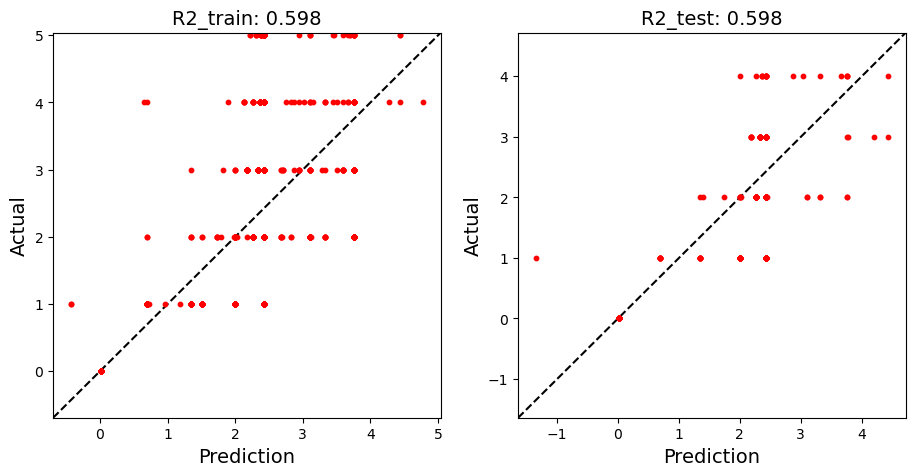

Mean Squared Error (MSE) 1.2722701395715934
Mean Absolute Error (MAE) 0.6866327535872366


In [11]:
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

    # evaluation
    plt.figure(figsize=(11, 5))

    plt.subplot(121)
    plt.scatter(pred_train, y_train, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_train: {r2_score(y_train, pred_train):.3f}", fontsize=14)
    

    plt.subplot(122)
    plt.scatter(pred_test, y_test, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_test: {r2_score(y_test, pred_test):.3f}", fontsize=14)
    
    plt.show()
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, pred_test)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, pred_test)
    print(f"Mean Squared Error (MSE)",mse)
    print(f"Mean Absolute Error (MAE)",mae) 
   


In [15]:
urlacc = 'https://raw.githubusercontent.com/ravsssh/HandballPrediction/main/Handball%20Prediction/data/Sensitivity/ACC.csv'
acc_df = pd.read_csv(urlacc, delimiter = ';')
acc_sensitivity = model.predict(acc_df)
print(acc_sensitivity)

3/3 [==============================] - 0s 1ms/step
[[-2.38078237e-02]
 [ 1.16143227e-02]
 [ 6.62784576e-02]
 [ 1.44675672e-01]
 [ 2.48763978e-01]
 [ 3.75971735e-01]
 [ 5.17767966e-01]
 [ 6.59653962e-01]
 [ 7.83128560e-01]
 [ 8.69473279e-01]
 [ 9.04361308e-01]
 [-2.38078237e-02]
 [ 3.29641700e-02]
 [ 1.15586698e-01]
 [ 2.27002084e-01]
 [ 3.65480244e-01]
 [ 5.22807658e-01]
 [ 6.83897316e-01]
 [ 8.28545868e-01]
 [ 9.35349286e-01]
 [ 9.86828625e-01]
 [ 9.74103034e-01]
 [-2.38078237e-02]
 [-2.23041177e-02]
 [-1.83290243e-02]
 [-1.25444531e-02]
 [-5.83332777e-03]
 [ 9.20116901e-04]
 [ 7.01302290e-03]
 [ 1.20233893e-02]
 [ 1.58143640e-02]
 [ 1.84690952e-02]
 [ 2.01963782e-02]
 [-2.38078237e-02]
 [-1.10026002e-02]
 [-7.97176361e-03]
 [-1.52439475e-02]
 [-3.15610170e-02]
 [-5.42339087e-02]
 [-7.98665881e-02]
 [-1.05181038e-01]
 [-1.27669871e-01]
 [-1.45913064e-01]
 [-1.59544766e-01]
 [-2.38078237e-02]
 [ 2.65657246e-01]
 [ 6.40994608e-01]
 [ 1.08797455e+00]
 [ 1.57166576e+00]
 [ 2.03825593e+00]

In [16]:
X

,7MACC,6MACC,9MACC,WINGACC,PIVOTACC,FASTBREAKACC
0,0.0,0.0,0,0.0,0.67,0.0
1,0.0,0.0,0,0.0,1.00,0.0
2,0.0,0.0,0,0.0,1.00,0.0
3,0.0,0.0,0,0.0,0.00,0.0
4,0.0,0.0,0,0.0,0.00,0.0
...,...,...,...,...,...,...
1521,0.0,0.0,0,0.0,0.00,0.0
1522,0.0,1.0,0,0.0,1.00,0.0
1523,0.0,0.0,0,0.0,1.00,0.0
1524,0.0,0.0,0,0.0,0.50,1.0


In [17]:
pd.DataFrame(acc_sensitivity).to_csv('sensitivitasaccuracy.csv', index=False)